In [73]:
import socket
socket.gethostname()

'Rajaths-Air.lan'

In [15]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


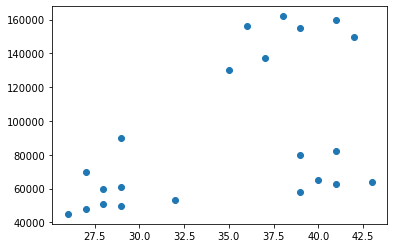

In [17]:
plt.scatter(df['Age'],df['Income($)'])

In [64]:
km = KMeans(n_clusters=3)
# km = KMeans(init='k-means++')
# km = KMeans()
km

KMeans(n_clusters=3)

In [65]:
cluster = km.fit_predict(df[['Age','Income($)']])
df['cluster'] = cluster

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


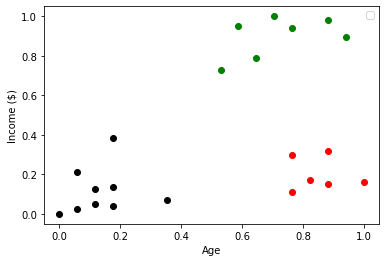

In [66]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

We observe misclassified datapoints due to mismatch in the scaling<br>
*   The scaling of y axis too large compared to scale of x axis
*   Can be resolved using the MinMaxScalar

In [67]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [68]:
cluster = km.fit_predict(df[['Age','Income($)']])
df['cluster'] = cluster

In [69]:
km.cluster_centers_         #center of each clusters

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

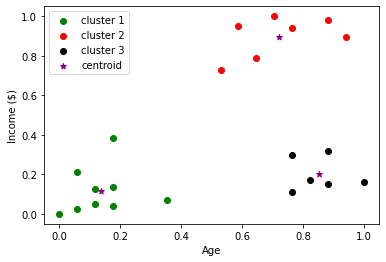

In [70]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],label='cluster 1',color='green')
plt.scatter(df2.Age,df2['Income($)'],label='cluster 2',color='red')
plt.scatter(df3.Age,df3['Income($)'],label='cluster 3',color='black')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [71]:
k_range = range(1,10)
sse =[]
for k in k_range:
    km = KMeans(n_clusters=k)
    a=km.fit_predict(df[['Age','Income($)']])
    sse.append(km.inertia_)
sse

[5.434011511988177,
 2.0911363886990766,
 0.47507834985530945,
 0.34910470944195643,
 0.2664030124668415,
 0.22020960864009395,
 0.184278684552248,
 0.13265419827245162,
 0.10383752586603559]

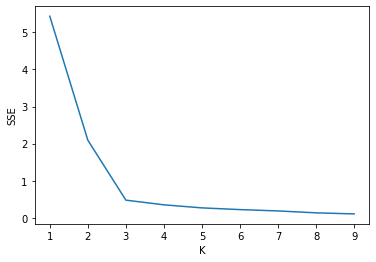

In [72]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_range,sse)